In [16]:
import pandas as pd

titanic = pd.read_excel('/home/addinedu/dev_ws/data/machine/titanic.xls')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


    except AttributeError:
        title.append(re.search('\, \s\w+(\s\w+)?\.', dataset['name']))

In [21]:
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])


titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [23]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')


for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')


titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(titanic['sex'])
titanic['gender'] = le_sex.transform(titanic['sex'])

le_sex.classes_

array(['female', 'male'], dtype=object)

In [25]:
le_grade = LabelEncoder()
le_grade.fit(titanic['title'])
titanic['grade'] = le_grade.transform(titanic['title'])

le_grade.classes_

array(['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m'], dtype=object)

In [26]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,gender,grade
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Rare_m,1,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,2


In [27]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int64  
 16  grade      1045 non-null   int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 147.0+ KB


In [28]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'grade']].astype('float')

y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [29]:
from sklearn.decomposition import PCA
def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [30]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)


In [31]:
import numpy as np

def print_variance_ratio(pca, only_sum=False):
    if only_sum == False:
        print('variance_ratio: ', pca. explained_variance_ratio_)
    print('sum of variance_ratio', np.sum(pca.explained_variance_ratio_))

In [32]:
pca_data, pca = get_pca_data(X_train, n_components=2)
print_variance_ratio(pca)

variance_ratio:  [0.93577394 0.06326916]
sum of variance_ratio 0.9990431009511263


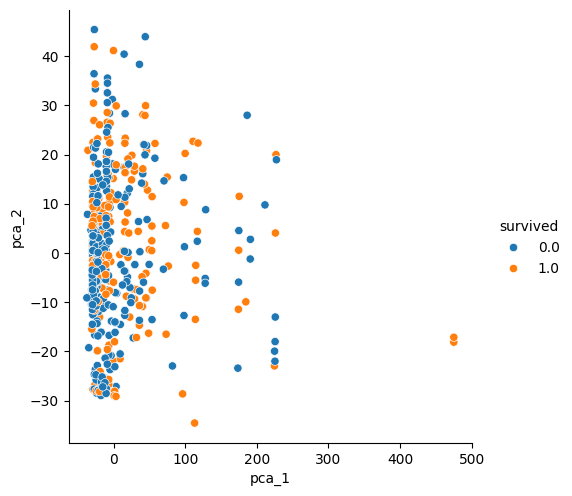

In [33]:
import seaborn as sns

pca_columns = ['pca_1', 'pca_2']
pca_pd = pd.DataFrame(pca_data, columns=pca_columns)
pca_pd['survived'] = y_train

sns.pairplot(pca_pd, hue='survived', height=5, x_vars=['pca_1'], y_vars='pca_2');

In [34]:
pca_data, pca = get_pca_data(X_train, n_components=3)
print_variance_ratio(pca)

variance_ratio:  [9.35773938e-01 6.32691630e-02 4.00903990e-04]
sum of variance_ratio 0.9994440049413535


In [37]:
pca_pd = get_pd_from_pca(pca_data, 3)

pca_pd['survived'] = y_train.values
pca_pd.head()

,pca_0,pca_1,pca_2,survived
0,-28.763184,4.479379,-0.451531,0
1,41.587362,22.084594,0.011834,0
2,-19.598979,-10.999936,0.558167,0
3,-28.232483,-6.559632,-1.349217,1
4,-29.055717,-1.510811,-0.538886,0


In [38]:
import plotly.express as px
fig = px.scatter_3d(pca_pd, x='pca_0', y='pca_1', z='pca_2', color='survived', symbol='survived', opacity=0.4)
fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))
fig.show()

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

estimators = [('scaler', StandardScaler()),
              ('pca', PCA(n_components=3)),
              ('clf', KNeighborsClassifier(n_neighbors=20))]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
print(accuracy_score(y_test, pred))

0.7799043062200957


In [40]:
dicaprio = np.array([[3, 18, 0, 0, 5, 1, 1]])
print('Decaprio: ', pipe.predict_proba(dicaprio)[0,1])

Decaprio:  0.1


/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

